# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [7]:
# Import your libraries
import scipy
import pandas as pd
import numpy as np
from scipy.stats import normaltest
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [6]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: scipy.stats.normaltest(d))

tests

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0    (2.4275685020428193, 0.2970709585552115)
1    (0.4732191494995319, 0.7892993902802043)
2    (1.2830690987317035, 0.5264838883157732)
3    (0.4865085236455512, 0.7840721288159791)
4    (0.4807512109818669, 0.7863324548041957)
dtype: object

#### Interpret the normaltest results and make your observations.

In [ ]:
# Explain the test results here

'''
El primer numero del resultado es la suma de los z-score del skew y kurtosis test. Que miden el apuntamiento,
y la asimetría de la distribución de los datos. 
El segundo valor es el p-value, cuando es muy pequeño se puede descartar la hipótesis nula, que en el caso de
del scipy.stats.normaltest la hipótesis nula es que la distribución de la muesta es normal.
Por tanto, de las 5 muestras dadas, las que presentan un p-value mas bajo, estarán mas alejadas de la distribución
normal.

'''

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

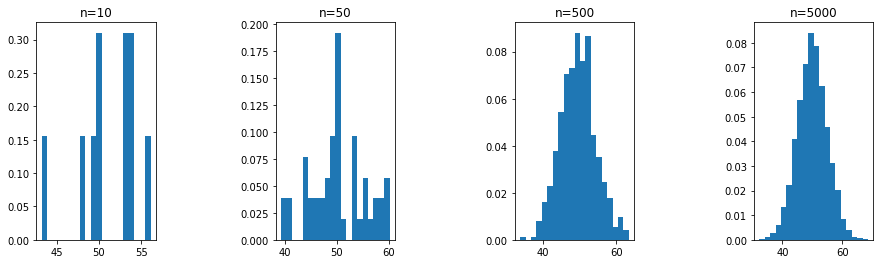

In [8]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here
'''
Según el Central Limit Theorem, la media de las medias extraidas de un numero n de muestras de una población,
se acercará a la media total de la población. Cuanto mayor sea el numero de muestras tomadas, más se acercará a 
distribución normal la representación de sus medias. 
'''


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

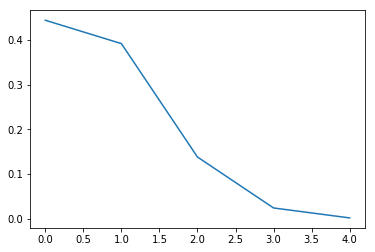

In [20]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
# Your comment here
'''
Experimento binominal en el que la probabilidad de exito es p = 0.15, en este caso pulsar en la Ap,
y la probabilidad de fracaso es 1-p = (0.85), no pulsar. En la anterior gráfica, al ser una n muy pequeña,
la probabilidad observada dista bastante de la p de éxito real establecida. 
En la distribución binomial, la probabilidad es la misma en cada sujeto y los resultados son independientes. 
En la gráfica anterior, al realizarse solo 4 experimentos, la probabilidad observada dista mucho de la real. 

'''

#### Now plot PMP with 50, 500, and 5000 visitors.

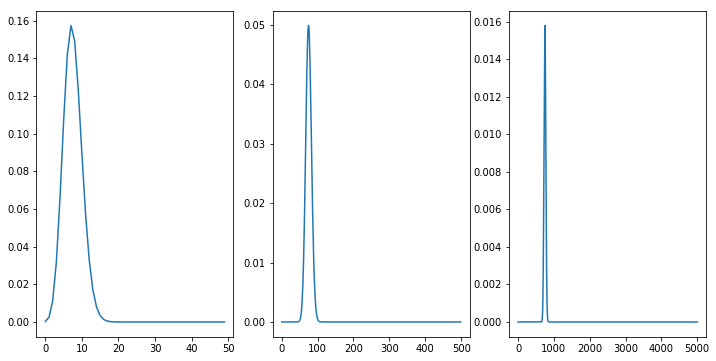

In [38]:
# Your code here

fig, ax = plt.subplots(1, 3, figsize = (12,6))

plt.subplot(1,3,1)
n, p = 50, 0.15
x = range(n)
dist = binom(n1, p)
plt.plot(x, dist.pmf(x))

plt.subplot(1,3,2)
n, p = 500, 0.15
x = range(n)
dist = binom(n, p)
plt.plot(x, dist.pmf(x))

plt.subplot(1,3,3)
n, p = 5000, 0.15
x = range(n)
dist = binom(n, p)
plt.plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here

'''
Cuanto mayor es la n, es decir el numero de experimentos, más se acerca la probabilidad observada a la probabiblidad
real dada para cada experimento independiente. 

'''

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
'''
Es una distribución de probabilidad discreta que expresa, a partir de una frecuencia de ocurrencia media,
la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo.

Se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, o sucesos "raros".

'''

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [49]:
# Your code here

from scipy.stats import poisson

mu = 300
k = 320

poisson.pmf(k, mu)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [44]:
# Your code here

poisson.pmf(60, 300)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

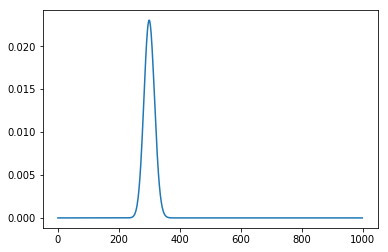

In [33]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)